## EDA for Charlie

Analysis will be carried out in the following order across all three scenarios
- dimension of database
- na handling
- feature extraction(PCA)
- visualization

**Importing the database**

In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

scenario_one=pd.read_csv("database/Scenario_1/Scenario_1_C.csv")
scenario_two=pd.read_csv("database/Scenario_2/Scenario_2_C.csv")
scenario_three=pd.read_csv("database/Scenario_3/Scenario_3_C.csv")
scenarios=[scenario_one,scenario_two,scenario_three]

**Dimension computing**

In [2]:
dims=[]
for scenario in scenarios:
    dims.append(scenario.shape)
for i in range(0,3):
    print("scenario ",i+1," has dimmension of ",dims[i])

scenario  1  has dimmension of  (43555, 256)
scenario  2  has dimmension of  (60944, 256)
scenario  3  has dimmension of  (43555, 787)


**NA handling**

In [3]:
#number of NAs
na_counts=[]
na_row_counts=[]
na_col_counts=[]
for scenario in scenarios:
    sceNa=scenario.isna()
    row_add=sceNa.sum(axis=1)
    col_add=sceNa.sum(axis=0)

    na_counts.append(sum(row_add))
    na_row_counts.append(len(row_add[row_add!=0]))
    na_col_counts.append(len(col_add[col_add!=0]))
for i in range(0,3):
    print("scenario ",i+1," has ",na_counts[i]," number of na values")
    print("scenario ",i+1," has ",na_row_counts[i]," number of na rows")
    print("scenario ",i+1," has ",na_col_counts[i]," number of na columns")

scenario  1  has  16798  number of na values
scenario  1  has  16798  number of na rows
scenario  1  has  1  number of na columns
scenario  2  has  20866  number of na values
scenario  2  has  20866  number of na rows
scenario  2  has  1  number of na columns
scenario  3  has  4138228  number of na values
scenario  3  has  43555  number of na rows
scenario  3  has  107  number of na columns


From the above result, it becomes obvious that empty columns should be eliminated for scenarios 1,2 and 3 as if rows are eliminated then either entire data set or large potion of data will be lost.

The following will be the function to eliminate columns containing NA value

In [45]:
def columnwise_na_elimiation(data):
    """
    The method filter out all columns contains NA value in the set

    Input: pandas dataframe
    Output: non-NA containing pandas dataframe 
    """
    col_na=data.isna().sum(axis=0)
    # print(col_na)
    col_na[col_na!=0]=1
    col_na=col_na.astype(bool)
    # print(col_na)
    col_na=~col_na
    # print(col_na)
    filtered_data=data.loc[:,col_na]
    return filtered_data

In [46]:
#sample testing for function
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, np.nan,12]}
# df = pd.DataFrame(data)
# print(df)
# print(columnwise_na_elimiation(df))

   A  B     C
0  1  5   9.0
1  2  6  10.0
2  3  7   NaN
3  4  8  12.0
   A  B
0  1  5
1  2  6
2  3  7
3  4  8



The following performs the elimination with checks:


In [47]:
nafree_sce1=columnwise_na_elimiation(scenario_one)
nafree_sce2=columnwise_na_elimiation(scenario_two)
nafree_sce3=columnwise_na_elimiation(scenario_three)
nafree_sces=[nafree_sce1,nafree_sce2,nafree_sce3]

In [49]:
dims2=[]
for scenario in nafree_sces:
    dims2.append(scenario.shape)
for i in range(0,3):
    print("scenario ",i+1," has dimmension of ",dims2[i])


na_counts=[]
for scenario in nafree_sces:
    sceNa=scenario.isna()
    row_add=sceNa.sum(axis=1)
    na_counts.append(sum(row_add))

for i in range(0,3):
    print("scenario ",i+1," has ",na_counts[i]," number of na values")

scenario  1  has dimmension of  (43555, 255)
scenario  2  has dimmension of  (60944, 255)
scenario  3  has dimmension of  (43555, 680)
scenario  1  has  0  number of na values
scenario  2  has  0  number of na values
scenario  3  has  0  number of na values



**Feature Extraction(PCA)**

In [67]:
from sklearn.decomposition import PCA

for i,sce in enumerate(nafree_sces):
    pca=PCA(n_components=5)
    pca.fit(sce.iloc[:,:-2])
    print("scenario ",i+1," have an explain ratio of ", sum(pca.explained_variance_ratio_)," with ",pca.n_components_," PC")

scenario  1  have an explain ratio of  0.9999495947419338  with  5  PC
scenario  2  have an explain ratio of  0.9999378245967758  with  5  PC
scenario  3  have an explain ratio of  0.996310121521048  with  5  PC


From the above cases, 2 PC already achieves a pretty good explain ratio, as they all reaching more then 0.95
When 5 PC are selected all ratio achieves more than 0.995, which is good and could potentially be used as training PCs.


**Visulization**

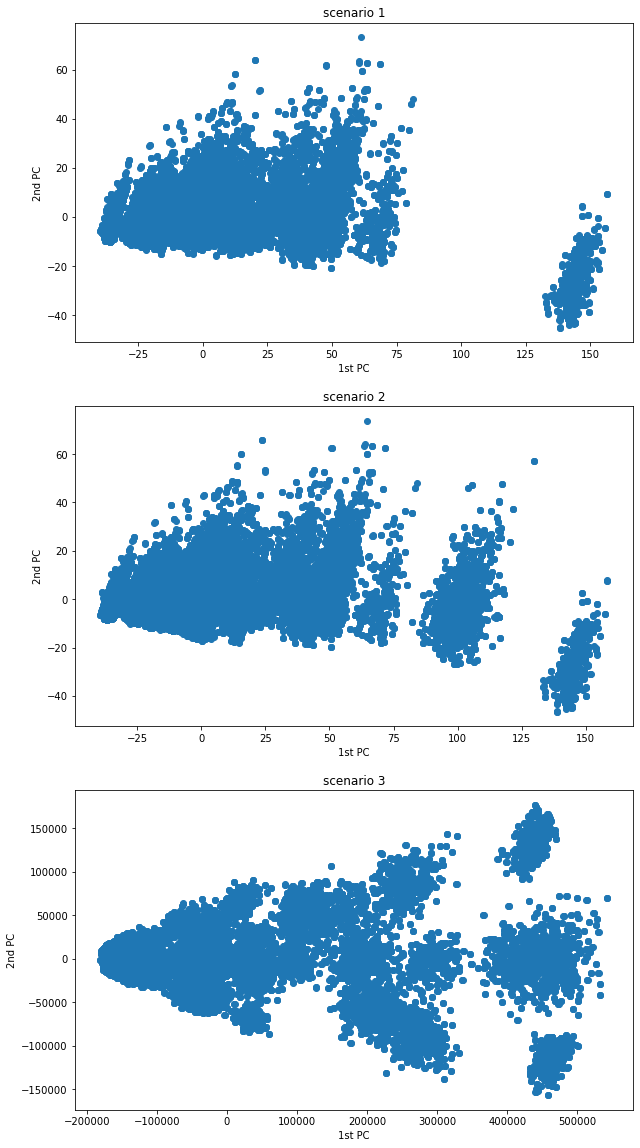

In [77]:
plt.figure(figsize=(10,20))
for i,sce in enumerate(nafree_sces):
    pca=PCA(n_components=2)
    pca.fit(sce.iloc[:,:-2])
    coor_vector=pca.transform(sce.iloc[:,:-2])
    plt.subplot(3,1,i+1)
    plt.scatter(coor_vector[:,0],coor_vector[:,1])
    plt.title("scenario "+str(i+1))
    plt.xlabel("1st PC")
    plt.ylabel("2nd PC")
plt.show()
